## Hoja de Trabajo 2 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo

------------

## Ejercicio 2 - Preguntas Prácticas

### Ejercicio 2.1

Usted es el gerente de una fábrica que produce dos tipos de productos: A y B. La fábrica tiene recursos limitados,
incluidas las horas de trabajo y las materias primas. Su objetivo es maximizar las ganancias mientras satisface la
demanda de ambos productos.


Para eso usted recolecta los siguientes datos:
- El producto A requiere 2 horas de mano de obra y 3 unidades de materia prima por unidad.
- El producto B requiere 4 horas de mano de obra y 2 unidades de materia prima por unidad.
- Tiene un total de 100 horas de mano de obra y 120 unidades de materia prima disponibles.
- La ganancia del producto A es de $10 por unidad y la del producto B es de $15 por unidad.

Usted sabe que la función que desea maximizar es la de la ganancia (10x+15y, donde x=producto A, y = producto B)

Responda:

1. **Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad**

Según el enunciado, las restricciones son:
- La fábrica tiene recursos limitados, incluidas las horas de mano de obra y las materias primas.
- Restricción de no-negatividad

Por tal razón, las fórmulas de las restricciones son:

$$ Restricción Mano de Obra: 2x+4y≤100 $$

$$ Restricción Materia Prima: 3x+2y≤120 $$

$$ Restricción No Negatividad: x≥0, y≥0 $$


2. **Usando programación lineal, determine cuántas unidades de cada producto se deben producir para maximizar la ganancia y cumplir con las restricciones de recursos.**
- Escriba un script en Python o en otro lenguaje de programación de su preferencia

Referencia:
- https://towardsdatascience.com/basic-linear-programming-in-python-with-pulp-d398d144802b

In [38]:
from pulp import *
pulp.LpSolverDefault.msg = 0

# Crear el problema
prob = LpProblem("HDT2-2.1", LpMaximize)

# Variables de decisión
x = LpVariable("x", 0, cat="Integer")  # Cantidad de producto A         Se agrega Integer para que sea entera la solución
y = LpVariable("y", 0, cat="Integer")  # Cantidad de producto B         Se agrega Integer para que sea entera la solución

# Función objetivo
prob += 10*x + 15*y, "Ganancia"

# Restricciones
prob += 2*x + 4*y <= 100, "Restricción Mano de Obra"
prob += 3*x + 2*y <= 120, "Restricción Materiales"
prob += x >= 0,           "Restricción No Negatividad A"
prob += y >= 0,           "Restricción No Negatividad B"

# Resolver el problema
prob.solve()

# Imprimir los resultados
print("Cantidad de producto A a producir:", value(x))
print("Cantidad de producto B a producir:", value(y))
print("Ganancia máxima:", value(prob.objective))


Cantidad de producto A a producir: 34.0
Cantidad de producto B a producir: 8.0
Ganancia máxima: 460.0


3. **Interprete el resultado**

En este caso, se tiene un total de 100 horas de mano de obra y 120 unidades de materia prima disponibles. Para poder maximizar la ganancia del producto A ($10 por unidad) y del producto B ($15 por unidad), se deben de producir 34 unidades del Producto A y 8 unidades del Producto B. 

Esto considerando que el producto A requiere 2 horas de mano de obra y 3 unidades de materia prima por unidad, mientras que el producto B requiere 4 horas de mano de obra y 2 unidades de materia prima por unidad.

Estos resultados indican que es más eficiente producir una mayor cantidad de productos A que de productos B, ya que el producto A genera una mayor ganancia por unidad. Sin embargo, se debe de producir ciertos productos B para poder maximizar la ganancia total.

Finalmente, es importante mencionar que estos valores se alinean con las restricciones del problema, por lo cual es una solución válida y óptima.

4. **Muestre una gráfica del feasible area mostrando el punto donde está su respuesta**

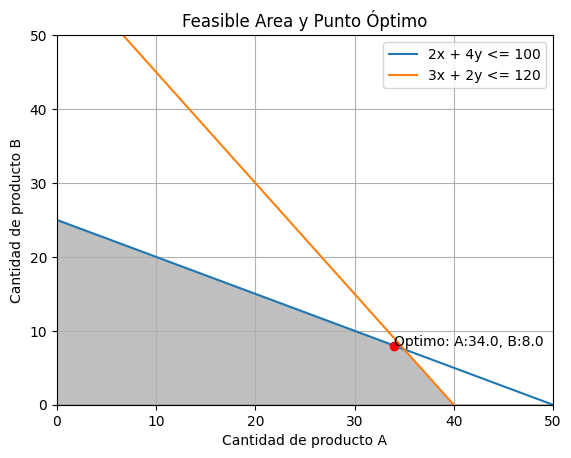

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Restricciones 
x_values = np.linspace(0, 100, 100)
y_labor = (100 - 2*x_values) / 4
y_material = (120 - 3*x_values) / 2

# Graficar las restricciones
plt.plot(x_values, y_labor, label='2x + 4y <= 100')
plt.plot(x_values, y_material, label='3x + 2y <= 120')

# Punto de optimización
plt.plot(value(x), value(y), 'ro')
plt.annotate(f'Optimo: A:{value(x)}, B:{value(y)}', (value(x), value(y)))

# Etiquetas y leyenda
plt.xlabel('Cantidad de producto A')
plt.ylabel('Cantidad de producto B')
plt.title('Feasible Area y Punto Óptimo')
plt.legend()

# Limites de los ejes
plt.xlim(0, 50)
plt.ylim(0, 50)

# Pintar feasible area
x_feasible = np.linspace(0, 100, 100)
y_feasible = np.minimum(y_labor, y_material)
plt.fill_between(x_feasible, y_feasible, color='grey', alpha=0.5)

# Mostrar la gráfica
plt.grid()
plt.show()


### Ejercicio 2.2

Está administrando la asignación de recursos en un proyecto que involucra tres tareas: Tarea A, Tarea B y Tarea C.
Cada tarea requiere una cantidad diferente de tiempo y personal para completarse. Su objetivo es asignar recursos
a estas tareas de una manera que maximice la ganancia total y satisfaga las restricciones del proyecto. Usted sabe
lo siguiente

- Tarea A:
    - Requiere 2 horas de trabajo y 1 personal
    - Produce una ganancia de $ 1500 al finalizar
- Tarea B:
    - Requiere 3 horas de trabajo y 2 personas
    - Produce una ganancia de $ 2500 al finalizar
- Tarea C:
    - Requiere 5 horas de trabajo y 3 personas
    - Produce una ganancia de $ 4000 al finalizar
    
Tiene un total de 15 horas de trabajo y 10 personas disponibles. Formule esto como un problema de programación
lineal para maximizar la ganancia total respetando las restricciones de recursos. Resuelva el problema y determine
la asignación óptima de recursos para cada tarea. Escriba un script en Python o en otro lenguaje de programación
de su preferencia y responda

1. **Escriba la fórmula de la función que debe maximizar**

$$ Ganancia = 1500x + 2500y + 4000z $$

Donde x = Cantidad de recursos asignados a la Tarea A, y = Cantidad de recursos asignados a la Tarea B, z = Cantidad de recursos asignados a la Tarea C.

2. **Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad**

Según el enunciado, las restricciones son:
- La fábrica tiene recursos limitados, incluidas las horas de trabajo y las personas.
- Restricción de no-negatividad

Por tal razón, las fórmulas de las restricciones son:

$$ HorasTrabajo: 2x + 3y + 5z ≤ 15 $$

$$ Personas: 1x + 2y + 3z ≤ 10 $$

$$ Restricción No Negatividad: x≥0, y≥0, z≥0 $$


3. **Determine las cantidades de asignación óptima. Interprete el resultado**

In [44]:
pulp.LpSolverDefault.msg = 0

# Crear el problema
prob = LpProblem("HDT2-2.2", LpMaximize)

# Variables de decisión
x = LpVariable("x", 0, cat="Integer")   # Cantidad de recursos a Tarea A         Se agrega Integer para que sea entera la solución
y = LpVariable("y", 0, cat="Integer")   # Cantidad de recursos a Tarea B         Se agrega Integer para que sea entera la solución
z = LpVariable("z", 0, cat="Integer")   # Cantidad de recursos a Tarea C         Se agrega Integer para que sea entera la solución

# Función objetivo
prob += 1500*x + 2500*y + 4000*z, "Ganancia"

# Restricciones
prob += 2*x + 3*y + 5*z <= 15, "Horas Trabajo Restricción"
prob += 1*x + 2*y + 3*z <= 10, "Personas Restricción"
prob += x >= 0,           "Restricción No Negatividad A"
prob += y >= 0,           "Restricción No Negatividad B"
prob += z >= 0,           "Restricción No Negatividad C"

# Resolver el problema
prob.solve()

# Imprimir los resultados
print("Asignación óptima para Tarea A:", value(x))
print("Asignación óptima para Tarea B:", value(y))
print("Asignación óptima para Tarea C:", value(z))
print("Ganancia máxima:", value(prob.objective))

Asignación óptima para Tarea A: 0.0
Asignación óptima para Tarea B: 5.0
Asignación óptima para Tarea C: 0.0
Ganancia máxima: 12500.0


En este caso, se tiene un total de 15 horas de trabajo y 10 personas disponibles. Para poder maximizar la ganancia total, respetando las restricciones de recursos, se debe de de darle todos los recursos a la Tarea B. Esto resulta en que se completen 5 veces la tarea B, y 0 veces la tarea A y C. 

En este caso, B es la única tarea cuyas restricciones son valores que dividen a 15 y 10, respectivamente. Por lo tanto, es la única tarea que puede ser completada un número entero de veces. Asimismo, presenta la mayor ganancia por recurso utilizado, por lo que es la que más conviene realizar. 

Ya que esta tarea presenta la mayor ganancia por recurso utilizado, y es la única que puede ser completada un número entero de veces, es la única que se debe de realizar. No hay necesidad de realizar otras tareas ya que no se puede obtener una ganancia mayor, y tampoco hay espacio para realizar otras tareas.

4. **¿Podría dibujar la feasible region? De ser sí, ¿Cómo? De ser no, ¿por qué?**


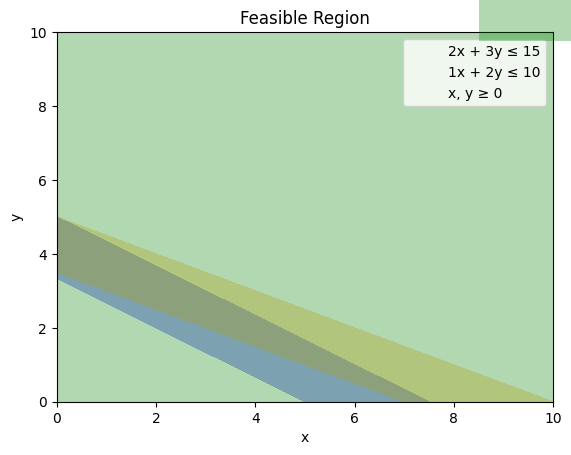

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon

# Coefficients of the objective function
c = np.array([1500, 2500, 4000])

# Coefficients of the constraint inequalities
A = np.array([[2, 3, 5],
              [1, 2, 3]])

# Right-hand sides of the constraints
b = np.array([15, 10])

# Define the feasible region
x_vals = np.linspace(0, 10, 400)
y_vals = np.linspace(0, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z1 = (15 - 2*X - 3*Y) / 5
Z2 = (10 - 1*X - 2*Y) / 3
Z3 = np.zeros_like(Z1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z1, levels=[0, 1], colors='blue', alpha=0.3)
ax.contourf(X, Y, Z2, levels=[0, 1], colors='orange', alpha=0.3)
ax.contourf(X, Y, Z3, levels=[0, 1], colors='green', alpha=0.3)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region')

# Add legend
legend_labels = ['2x + 3y ≤ 15', '1x + 2y ≤ 10', 'x, y ≥ 0']
ax.add_patch(Polygon([[0, 0], [0, 0], [0, 0]], color='blue', alpha=0.3))
ax.add_patch(Polygon([[0, 0], [0, 0], [0, 0]], color='orange', alpha=0.3))
ax.add_patch(Polygon([[0, 0], [0, 0], [0, 0]], color='green', alpha=0.3))
plt.legend(legend_labels)

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.show()
